In [9]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets as dt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
from torch import nn
from torch.nn import functional as F

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


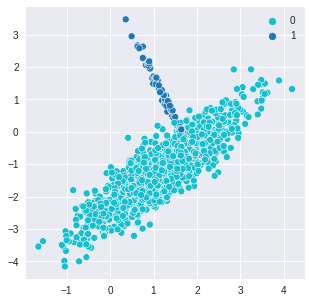

(1500, 2)
(1500,)


In [10]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([1],plt_ind_list):
    X,y = dt.make_classification(
    n_samples=1500, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95],
    flip_y=0.01, #add noise
    class_sep =1.2,
    random_state=42
)
    palette = {0:"tab:cyan",
               1:"tab:blue", 
               }
    sns.scatterplot(X[:,0],X[:,1], hue = y, palette=palette )

plt.show()

print(X.shape)
print(y.shape)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length
trainset = dataset(X,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [12]:
#defining the network

class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,2)
    self.fc2 = nn.Linear(2,2)
    self.fc3 = nn.Linear(2,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [14]:
#hyper parameters
learning_rate = 0.001
epochs = 1000
# Model , Optimizer, Loss
model = Net(input_shape=X.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()


In [26]:
print(model)

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
)


In [22]:
# #forward loop
# losses = []
# accur = []
# for i in range(epochs):
#   for j,(x_train,y_train) in enumerate(trainloader):
    
#     #calculate output
#     output = model(x_train)
 
#     #calculate loss
#     loss = loss_fn(output,y_train.reshape(-1,1))
#     print(output)
#     #accuracy
#     predicted = model(torch.tensor(X,dtype=torch.float32))
#     acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
#     #backprop
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#   if i%50 == 0:
#     losses.append(loss)
#     accur.append(acc)
#     print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

tensor([[0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0.0593],
        [0

tensor([[0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591]], grad_fn=<SigmoidBackward0>)
tensor([[0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],
        [0.0591],

tensor([[0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589]], grad_fn=<SigmoidBackward0>)
tensor([[0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],
        [0.0589],

tensor([[0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0.0587],
        [0

tensor([[0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0.0586],
        [0

tensor([[0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0.0584],
        [0

tensor([[0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0.0583],
        [0

tensor([[0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0.0581],
        [0

tensor([[0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0.0580],
        [0

tensor([[0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0.0579],
        [0

tensor([[0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0.0578],
        [0

tensor([[0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0.0576],
        [0

tensor([[0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0.0575],
        [0

tensor([[0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0.0574],
        [0

tensor([[0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0.0573],
        [0

tensor([[0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0.0572],
        [0

tensor([[0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0.0571],
        [0

tensor([[0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0.0570],
        [0

tensor([[0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0.0569],
        [0

tensor([[0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0.0568],
        [0

tensor([[0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0.0567],
        [0

tensor([[0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0.0566],
        [0

tensor([[0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0

tensor([[0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0.0565],
        [0

tensor([[0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0.0564],
        [0

tensor([[0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0

tensor([[0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0.0563],
        [0

tensor([[0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0.0562],
        [0

tensor([[0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0

tensor([[0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0.0561],
        [0

tensor([[0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0

tensor([[0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0.0560],
        [0

tensor([[0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0

tensor([[0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0.0559],
        [0

In [35]:
#train the network 

epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    for features, targets in trainloader: 
        output = model.forward(features)
        loss = loss_fn(output.view(-1), targets.float())
        print(loss)
        #initialize gradient to zero
        optimizer.zero_grad()
        #back propagation
        loss.backward()
        #update weights
        optimizer.step()
    
        losses.append(loss.data.numpy())
#     model.eval()
#     for i in output.data[i]:
#         c = output.data
#         if c>0:
#             c = 1
#         else: 
#             c =0
    
#     train_accuracy = (c==targets).sum().item()/targets.shape[0]
#     print("accuracy:", train_accuracy)
    
    

tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1017, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0575, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3226, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2784, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3668, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3225, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<Bina

tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3669, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3227, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3606, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1016, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0573, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3227, grad_fn=<Bina

tensor(0.1015, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0572, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3228, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2785, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3671, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3228, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3607, grad_fn=<Bina

tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3608, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1457, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1014, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0570, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3229, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2786, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2786, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3673, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3229, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3609, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1012, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0568, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3230, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2787, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3674, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3230, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<Bina

tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3611, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1011, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0567, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<Bina

tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2787, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3675, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3612, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1455, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0566, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3676, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3613, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0565, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<Bina

tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0565, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3677, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3232, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3613, grad_fn=<Bina

tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<Bina

tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<Bina

tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2788, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3678, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1454, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0563, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3234, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3616, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3680, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0562, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<Bina

tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2789, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<Bina

tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1452, grad_fn=<Bina

tensor(0.3681, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3235, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2344, grad_fn=<Bina

In [18]:
#plotting the loss
plt.plot(losses.detach().numpy())
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

AttributeError: 'list' object has no attribute 'detach'

Text(0, 0.5, 'loss')

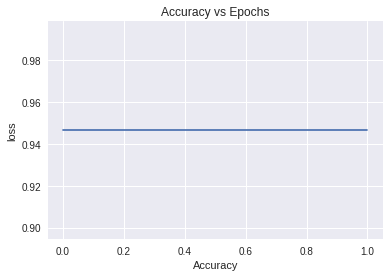

In [21]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [31]:
print(model.fc1.weight)
print(model.fc2.weight)
print(model.fc3.weight)

Parameter containing:
tensor([[-0.1871,  0.1602],
        [-0.6412,  0.0680]], requires_grad=True)
Parameter containing:
tensor([[-0.5551, -0.2165],
        [ 0.4571,  0.0562]], requires_grad=True)
Parameter containing:
tensor([[-0.1813, -0.4105]], requires_grad=True)


In [32]:
print(model.fc1.bias)
print(model.fc2.bias)
print(model.fc3.bias)

Parameter containing:
tensor([ 0.0413, -0.6355], requires_grad=True)
Parameter containing:
tensor([-0.4527, -0.6512], requires_grad=True)
Parameter containing:
tensor([-2.8265], requires_grad=True)
